In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
# use seaborn plotting defaults
import seaborn as sns; sns.set()

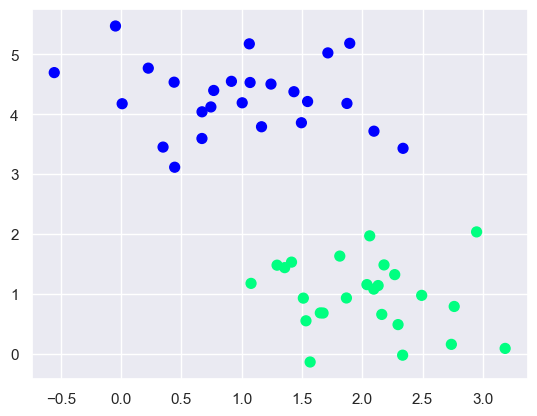

In [4]:
# make_blobs is a function provided by scikit-learn (sklearn.datasets) 
# that generates synthetic datasets for clustering and classification tasks.

from sklearn.datasets import make_blobs

#n_samples specifies the total number of points equally divided among clusters.
#centers specifies the number of centers to generate, or the fixed center locations.
#random_state sets the seed for random number generation, ensuring reproducibility.
#cluster_std is the standard deviation of the clusters.

X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

#plotting the graph 

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')

In [5]:
# "Support vector classifier"
from sklearn.svm import SVC 
# kernel='linear': Specifies the type of kernel function to be used in the algorithm. 
# In this case, it's set to 'linear', indicating a linear kernel.
model = SVC(kernel='linear', C=1)
model.fit(X, y)

SVC(C=1, kernel='linear')

In [6]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    # ax: The axes object where the plot will be drawn.
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    # np.meshgrid() is used to create a grid of coordinates from x and y
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    # model.decision_function(xy) computes the distance from the samples to the separating hyperplane.
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    #sets the limits of the x-axis and y-axis to the original limits
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

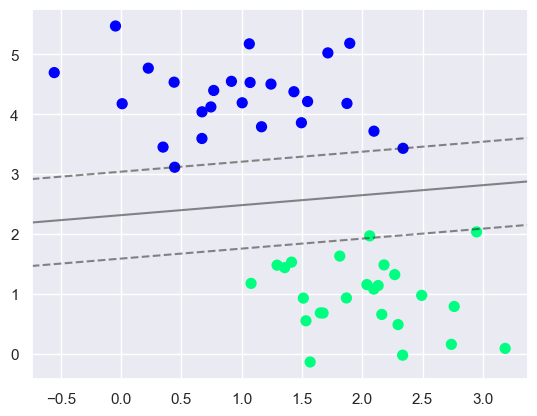

In [7]:
# plotting the data with the hyperplane 

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_function(model);

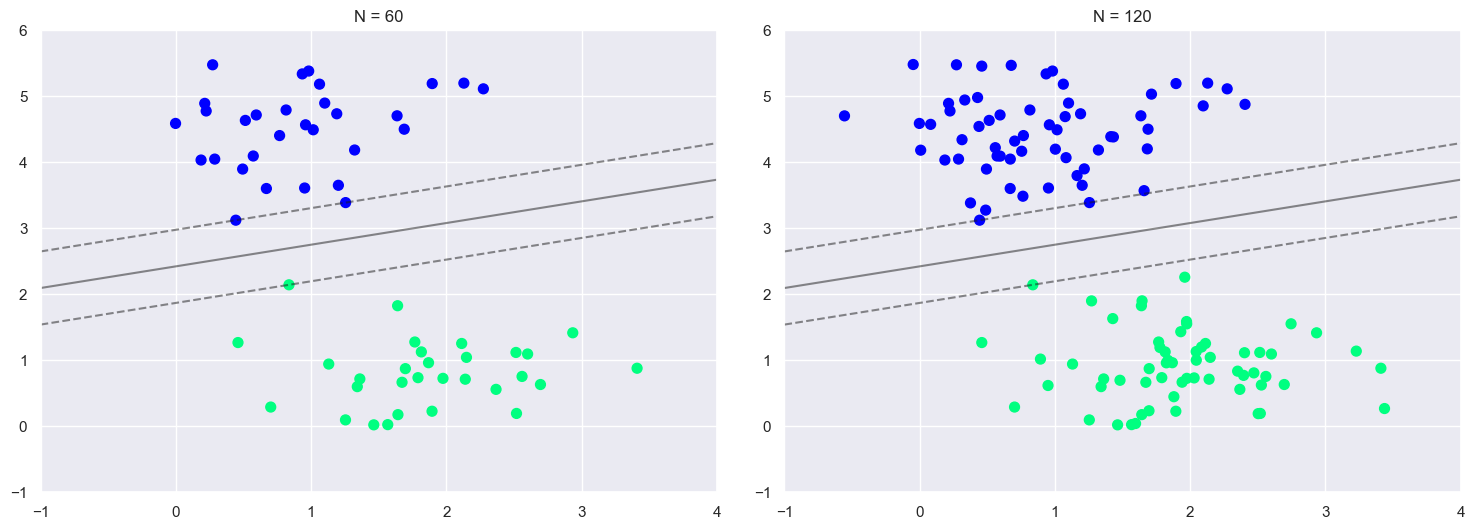

In [8]:
#repeating the points for more samples 

def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# for n= 60 and 120 

for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))